<a href="https://colab.research.google.com/github/wanruu/CS5487/blob/main/pca_svm_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import RepeatedKFold


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import contingency_matrix

import matplotlib.pyplot as plt
import tqdm

In [2]:
vecs=np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/digits4000_txt/digits4000_digits_vec.txt')
labels=np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/digits4000_txt/digits4000_digits_labels.txt')

100%|██████████| 734/734 [28:36<00:00,  2.34s/it]


[302, 1.0, 0.9015]


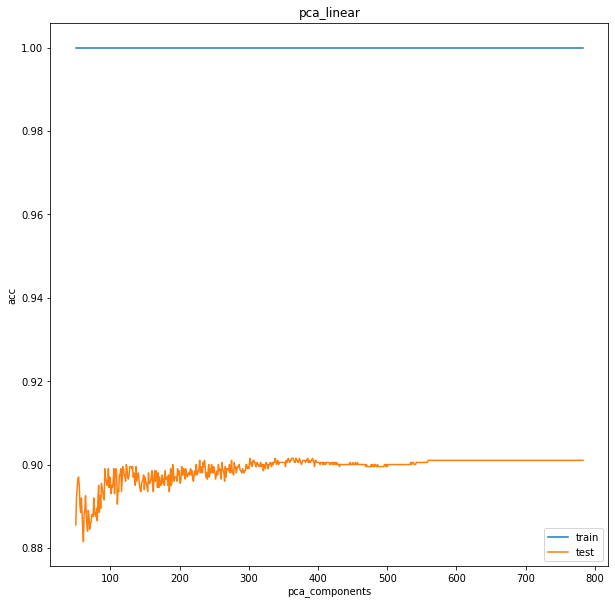

In [3]:
pca_components=[]
pca_train_acc=[]
pca_test_acc=[]
for i in tqdm.tqdm(range(734)):
  #pca with i+1 eigenvalues
  pca_component=i+50
  pca = PCA(n_components=pca_component)
  pca_data = pca.fit_transform(vecs)

  pca_train_data=pca_data[:2000]
  pca_test_data=pca_data[2000:]
  train_label=labels[:2000]
  test_label=labels[2000:]

  #shuffle
  pca_train_data, pca_train_label = shuffle(pca_train_data, train_label, random_state=123)
  pca_test_data, pca_test_label = shuffle(pca_test_data, test_label, random_state=123)
  
  #svm with 'rbf' kernel C=4
  #svm with 'poly' kernel C=10
  #svm with 'sigmoid' kernel C=0.4
  #svm with 'linear' kernel C=any
  classifier = svm.SVC(C=10,kernel='linear')
  classifier.fit(pca_train_data, pca_train_label)

  pca_components.append(pca_component)# # of eigenvalues
  pca_train_acc.append(classifier.score(pca_train_data, pca_train_label))# train_acc
  pca_test_acc.append(classifier.score(pca_test_data, pca_test_label))# test_acc

plt.figure(figsize=(10, 10))
plt.plot(pca_components,pca_train_acc,label='train')
plt.plot(pca_components,pca_test_acc,label='test')
plt.xlabel('pca_components')
plt.ylabel('acc')
plt.title('pca_linear')
plt.legend()
plt.show

#best pca
idx=pca_test_acc.index(max(pca_test_acc))
print([pca_components[idx],pca_train_acc[idx],max(pca_test_acc)])